1. 导入并清洗数据集  
2. 添加描述符  
3. 使用sklearn进行训练，对不同方法进行比较

In [1]:
from matminer.datasets import load_dataset
df = load_dataset('elastic_tensor_2015', data_home = '.')
df.head()

,material_id,formula,nsites,space_group,volume,structure,elastic_anisotropy,G_Reuss,G_VRH,G_Voigt,K_Reuss,K_VRH,K_Voigt,poisson_ratio,compliance_tensor,elastic_tensor,elastic_tensor_original,cif,kpoint_density,poscar
0,mp-10003,Nb4CoSi,12,124,194.419802,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,96.844535,97.141604,97.438674,194.267623,194.268884,194.270146,0.285701,"[[0.004385293093993, -0.0016070693558990002, -...","[[311.33514638650246, 144.45092552856926, 126....","[[311.33514638650246, 144.45092552856926, 126....",#\#CIF1.1\n###################################...,7000,Nb8 Co2 Si2\n1.0\n6.221780 0.000000 0.000000\n...
1,mp-10010,Al(CoSi)2,5,164,61.987320,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,93.939650,96.252006,98.564362,173.647763,175.449907,177.252050,0.268105,"[[0.0037715428949660003, -0.000844229828709, -...","[[306.93357350984974, 88.02634955100905, 105.6...","[[306.93357350984974, 88.02634955100905, 105.6...",#\#CIF1.1\n###################################...,7000,Al1 Co2 Si2\n1.0\n3.932782 0.000000 0.000000\n...
2,mp-10015,SiOs,2,221,25.952539,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,120.962289,130.112955,139.263621,295.077545,295.077545,295.077545,0.307780,"[[0.0019959391925840004, -0.000433146670736000...","[[569.5291276937579, 157.8517489654999, 157.85...","[[569.5291276937579, 157.8517489654999, 157.85...",#\#CIF1.1\n###################################...,7000,Si1 Os1\n1.0\n2.960692 0.000000 0.000000\n0.00...
3,mp-10021,Ga,4,63,76.721433,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,12.205989,15.101901,17.997812,49.025963,49.130670,49.235377,0.360593,"[[0.021647143908635, -0.005207263618160001, -0...","[[69.28798774976904, 34.7875015216915, 37.3877...","[[70.13259066665267, 40.60474945058445, 37.387...",#\#CIF1.1\n###################################...,7000,Ga4\n1.0\n2.803229 0.000000 0.000000\n0.000000...
4,mp-10025,SiRu2,12,62,160.300999,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,100.110773,101.947798,103.784823,255.055257,256.768081,258.480904,0.324682,"[[0.00410214297725, -0.001272204332729, -0.001...","[[349.3767766177825, 186.67131003104407, 176.4...","[[407.4791016459293, 176.4759188081947, 213.83...",#\#CIF1.1\n###################################...,7000,Si4 Ru8\n1.0\n4.037706 0.000000 0.000000\n0.00...


In [2]:
to_keep = ['formula', 'structure', 'K_VRH']
df = df[to_keep]
df.head()

,formula,structure,K_VRH
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081


In [4]:
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, 'formula')
df.head()

StrToComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)"
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)"
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)"
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga)
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)"


In [10]:
from matminer.featurizers.composition import ElementProperty

ep_feat = ElementProperty.from_preset(preset_name = 'magpie')
df = ep_feat.featurize_dataframe(df, col_id = 'composition')
df.head()

ElementProperty:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,1.548471,0.258079,0.430131,0.0,194.0,229.0,35.0,222.833333,9.611111,229.0
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,1.548471,0.619388,0.743266,0.0,194.0,227.0,33.0,213.400000,15.520000,194.0
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,0.000000,0.000000,0.000000,0.0,194.0,227.0,33.0,210.500000,16.500000,194.0
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,0.000000,0.000000,0.0,64.0,64.0,0.0,64.000000,0.000000,64.0
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,0.000000,0.000000,0.000000,0.0,194.0,227.0,33.0,205.000000,14.666667,194.0


In [11]:
from matminer.featurizers.conversions import CompositionToOxidComposition
from matminer.featurizers.composition import OxidationStates

df = CompositionToOxidComposition().featurize_dataframe(df, 'composition')
df.head()

CompositionToOxidComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,0.258079,0.430131,0.0,194.0,229.0,35.0,222.833333,9.611111,229.0,"(Nb0+, Co0+, Si0+)"
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,0.619388,0.743266,0.0,194.0,227.0,33.0,213.400000,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)"
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,0.000000,0.000000,0.0,194.0,227.0,33.0,210.500000,16.500000,194.0,"(Si4-, Os4+)"
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,0.000000,0.0,64.0,64.0,0.0,64.000000,0.000000,64.0,(Ga0+)
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,0.000000,0.000000,0.0,194.0,227.0,33.0,205.000000,14.666667,194.0,"(Si4-, Ru2+)"


In [12]:
os_feat = OxidationStates()
df = os_feat.featurize_dataframe(df, 'composition_oxid')

OxidationStates:   0%|          | 0/1181 [00:00<?, ?it/s]

<bound method NDFrame.head of         formula                                          structure  \
0       Nb4CoSi  [[0.94814328 2.07280467 2.5112    ] Nb, [5.273...   
1     Al(CoSi)2  [[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...   
2          SiOs   [[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]   
3            Ga  [[0.         1.09045794 0.84078375] Ga, [0.   ...   
4         SiRu2  [[1.0094265  4.24771709 2.9955487 ] Si, [3.028...   
...         ...                                                ...   
1176     Ti2CdC  [[1.55171489 0.89588144 8.41159136] Ti, [-1.88...   
1177       ScSi  [[0.         8.53417539 0.91740975] Sc, [0.   ...   
1178        YSi  [[0.       9.084549 0.960921] Y, [0.       1.4...   
1179      Al2Cu  [[5.11035838 2.07486738 0.        ] Al, [3.996...   
1180    VCu3Se4  [[0. 0. 0.] V, [0.       2.824189 0.      ] Cu...   

           K_VRH   composition  MagpieData minimum Number  \
0     194.268884  (Nb, Co, Si)                       14.0   
1     1

In [13]:
df.head()

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,229.0,35.0,222.833333,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,227.0,33.0,213.400000,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,227.0,33.0,210.500000,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,64.0,0.0,64.000000,0.000000,64.0,(Ga0+),0,0,0,0.000000
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,227.0,33.0,205.000000,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641


In [14]:
from matminer.featurizers.structure import DensityFeatures

df_feat = DensityFeatures()
df = df_feat.featurize_dataframe(df, 'structure')
df.head()

DensityFeatures:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000,7.834556,16.201654,0.688834
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983,5.384968,12.397466,0.644386
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854,13.968635,12.976265,0.569426
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,64.0,(Ga0+),0,0,0,0.000000,6.036267,19.180359,0.479802
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641,9.539514,13.358418,0.598395


In [16]:
y = df['K_VRH'].values
excluded = ['K_VRH', 'formula', 'structure', 'composition', 'composition_oxid']
X = df.drop(excluded, axis = 1)

In [17]:
X.shape, y.shape

((1181, 139), (1181,))

In [18]:
from sklearn import tree
from sklearn.metrics import mean_squared_error
import numpy as np

clf = tree.DecisionTreeRegressor()
clf.fit(X, y)

print('training R2 = ' + str(round(clf.score(X, y), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true = y,
                                                         y_pred = clf.predict(X))))

training R2 = 1.0
training RMSE = 0.000


10:10继续

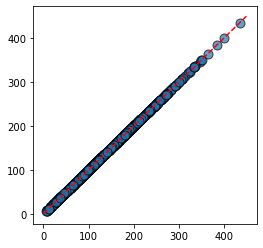

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (4, 4))
plt.scatter(y, clf.predict(X), s = 80, edgecolor = 'k', alpha = 0.7)
plt.plot([0, 450], [0, 450], 'r--')
plt.show()

In [20]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits = 10, shuffle = True)
r2_scores_clf = cross_val_score(clf, X, y, scoring = 'r2', cv = crossvalidation)
rmse_scores_clf = cross_val_score(clf, X, y,
                                  scoring = 'neg_root_mean_squared_error',
                                 cv = crossvalidation)
print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores_clf), r2_scores_clf.mean()))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores_clf),
                                      -rmse_scores_clf.mean()))

Cross-validation results:
Folds: 10, mean R2: 0.855
Folds: 10, mean RMSE: 26.013


In [21]:
from sklearn.model_selection import cross_val_predict
y_cv = cross_val_predict(clf, X, y, cv = crossvalidation)

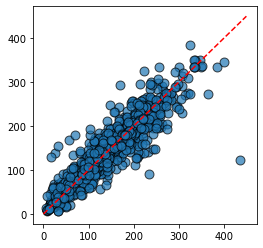

In [23]:
plt.figure(figsize = (4, 4))
plt.scatter(y, y_cv, s = 80, edgecolor = 'k', alpha = 0.7)
plt.plot([0, 450], [0, 450], 'r--')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 50, random_state = 1)
rf.fit(X, y)
print('training R2 = ' + str(round(rf.score(X, y), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true = y,
                                                         y_pred = rf.predict(X))))

training R2 = 0.989
training RMSE = 7.669


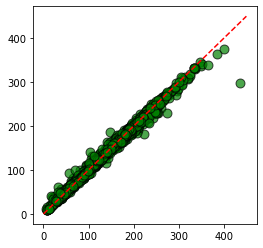

In [27]:
plt.figure(figsize = (4, 4))
plt.scatter(y, rf.predict(X), s = 80, c = 'g', edgecolor = 'k', alpha = 0.7)
plt.plot([0, 450], [0, 450], 'r--')
plt.show()

In [28]:
r2_scores_rf = cross_val_score(rf, X, y, scoring = 'r2', cv = crossvalidation)
rmse_scores_rf = cross_val_score(rf, X, y,
                                  scoring = 'neg_root_mean_squared_error',
                                 cv = crossvalidation)
print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores_rf), r2_scores_rf.mean()))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores_rf),
                                      -rmse_scores_rf.mean()))

Cross-validation results:
Folds: 10, mean R2: 0.927
Folds: 10, mean RMSE: 19.331


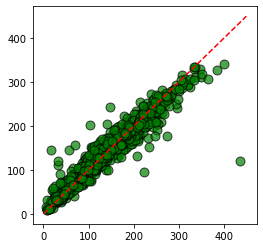

In [29]:
plt.figure(figsize = (4, 4))
plt.scatter(y, cross_val_predict(rf, X, y, cv = crossvalidation),
            s = 80, c = 'g', edgecolor = 'k', alpha = 0.7)
plt.plot([0, 450], [0, 450], 'r--')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 1)
rf_reg = RandomForestRegressor(n_estimators = 50, random_state = 1)
rf_reg.fit(X_train, y_train)

print('training R2 = ' + str(round(rf_reg.score(X_train, y_train), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true = y_train,
                                                         y_pred = rf_reg.predict(X_train))))
print('test R2 = ' + str(round(rf_reg.score(X_test, y_test), 3)))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_true = y_test,
                                                      y_pred = rf_reg.predict(X_test))))

training R2 = 0.987
training RMSE = 8.218
test R2 = 0.941
test RMSE = 17.013


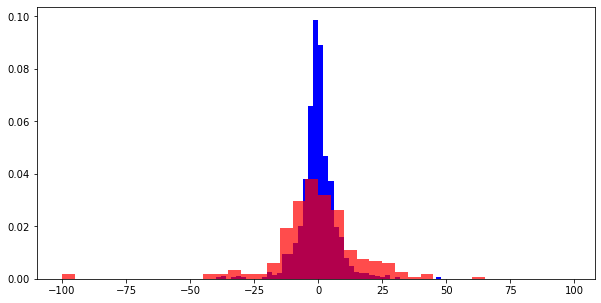

In [32]:
plt.figure(figsize = (10, 5))
plt.hist(y_train - rf_reg.predict(X_train), color = 'blue',
        bins = np.arange(-100, 100, 2), density = True)
plt.hist(y_test - rf_reg.predict(X_test), color = 'red',
        bins = np.arange(-100, 100, 5), density = True, alpha = 0.7)
plt.show()

In [33]:
importances = rf.feature_importances_
imp_sort = np.argsort(importances)[::-1]
feat_name = np.array(X.columns)

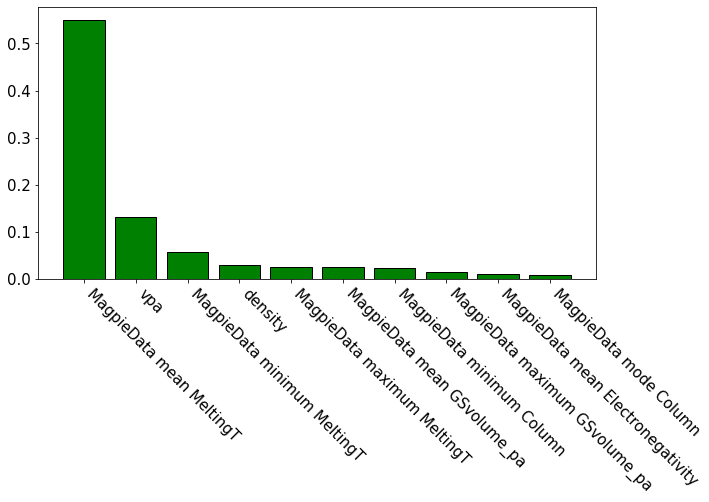

In [51]:
plt.figure(figsize = (10, 5))
plt.bar(x = feat_name[imp_sort][0:10], height = importances[imp_sort][0:10],
       color = 'g', edgecolor = 'k')
plt.xticks(rotation = -45, fontsize = 15, ha = 'left')
plt.yticks(fontsize = 15)
plt.show()

In [40]:
a = np.array([3, 1, 4, 1, 5, 9])
a

array([3, 1, 4, 1, 5, 9])

In [49]:
a[[1, 3, 0, 2, 4, 5]]

array([1, 1, 3, 4, 5, 9])

In [41]:
np.sort(a)

array([1, 1, 3, 4, 5, 9])

In [42]:
np.argsort(a)

array([1, 3, 0, 2, 4, 5], dtype=int64)

In [46]:
np.argsort(a)[::2]

array([1, 0, 4], dtype=int64)

In [44]:
np.argsort(a)[::-1]

array([5, 4, 2, 0, 3, 1], dtype=int64)

In [47]:
imp_sort

array([ 21, 137,  18, 136,  19, 111,  24, 109,  45,  29,  77, 105,   8,
       138,   6,   9,  94,  22,  47, 113,  42,  39, 107,  61,  11,  27,
        28, 112, 110,  23,  37,  10, 106,  20,  75,  46, 104,  81, 129,
        93, 102,  95,  64,   3,  72,  13,  33, 135,  44,  15,  57,  34,
       130, 108,  51,  92,  40,   4,  73, 103, 117,  38,  16,  41,   1,
        88,  58,  63, 119,   2,   5,  76,  43,  65,  14,  83, 128, 123,
        52,  87,   0, 127, 131, 118,  62,  26,   7,  74,  36, 132,  82,
        86, 134, 124,  69,  12,  25,  17, 116,  90,  60, 133,  70,  53,
        48,  85,  32, 126,  50,  91,  89,  31, 121, 122,  54,  84,  30,
       115, 125,  35,  80,  55,  78,  79,  56,  67,  59,  68,  49, 120,
        71, 114,  66, 100,  99,  98,  97,  96, 101], dtype=int64)

In [48]:
feat_name

array(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Number',
       'MagpieData minimum MendeleevNumber',
       'MagpieData maximum MendeleevNumber',
       'MagpieData range MendeleevNumber',
       'MagpieData mean MendeleevNumber',
       'MagpieData avg_dev MendeleevNumber',
       'MagpieData mode MendeleevNumber',
       'MagpieData minimum AtomicWeight',
       'MagpieData maximum AtomicWeight', 'MagpieData range AtomicWeight',
       'MagpieData mean AtomicWeight', 'MagpieData avg_dev AtomicWeight',
       'MagpieData mode AtomicWeight', 'MagpieData minimum MeltingT',
       'MagpieData maximum MeltingT', 'MagpieData range MeltingT',
       'MagpieData mean MeltingT', 'MagpieData avg_dev MeltingT',
       'MagpieData mode MeltingT', 'MagpieData minimum Column',
       'MagpieData maximum Column', 'MagpieData range Column',
       'MagpieData mean Column